In [212]:
##########
# Hexagons with homicide decrease/without homicide waves
%pwd

'/home/nitomanto/decreasing-homicide-waves'

In [213]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import re
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import shapely
import seaborn as sns

# BASIC PLOTS

In [214]:
df = gpd.read_file('/home/nitomanto/anita-ujp-homicide/hexhom.csv')

In [215]:
type(df)

pandas.core.frame.DataFrame

In [216]:
df.head(6)

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geom1,geom2,geom3,geom4,geom5,geom6,geom7,geom8,geom9,geom10,geom11,geom12,geom13,geom14
0,AJ-37,1874,0,0,NA,list(c(-87.6186904368855,-87.6216943961905,-87.6277023148006,-87.6307062741056,-87.6277023148006,-87.6216943961905,-87.6186904368855,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
1,AK-37,1874,0,4.19822270593398,0,list(c(-87.6096785589704,-87.6126825182754,-87.6186904368855,-87.6216943961905,-87.6186904368855,-87.6126825182754,-87.6096785589704,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))
2,AL-37,1874,0,0.001777294066012,0,list(c(-87.6006666810553,-87.6036706403603,-87.6096785589704,-87.6126825182754,-87.6096785589704,-87.6036706403603,-87.6006666810553,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
3,AM-37,1874,0,0,NA,list(c(-87.5916548031402,-87.5946587624452,-87.6006666810553,-87.6036706403603,-87.6006666810553,-87.5946587624452,-87.5916548031402,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))
4,AN-37,1874,0,0,NA,list(c(-87.5826429252251,-87.5856468845301,-87.5916548031402,-87.5946587624452,-87.5916548031402,-87.5856468845301,-87.5826429252251,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
5,AO-37,1874,0,0,NA,list(c(-87.5736310473101,-87.576635006615,-87.5826429252251,-87.5856468845301,-87.5826429252251,-87.576635006615,-87.5736310473101,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))


In [217]:
df.geom1.dtype

dtype('O')

In [218]:
df['geom1'] = df.apply(lambda row: re.sub(r'[a-z*+*a-z*+*]', '', row.geom1), axis=1)
df['geom1'] = df.apply(lambda row: row.geom1[2:], axis=1)

In [219]:
df['geom14'] = df.apply(lambda row: row.geom14[:-2], axis=1)

In [220]:
for n in range(1,15):
    df[f'geom{n}'] = df[f'geom{n}'].astype(float)

In [221]:
df.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geom1,geom2,geom3,geom4,geom5,geom6,geom7,geom8,geom9,geom10,geom11,geom12,geom13,geom14
0,AJ-37,1874,0,0,NA,-87.618690,-87.621694,-87.627702,-87.630706,-87.627702,-87.621694,-87.618690,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746
1,AK-37,1874,0,4.19822270593398,0,-87.609679,-87.612683,-87.618690,-87.621694,-87.618690,-87.612683,-87.609679,41.644543,41.639340,41.639340,41.644543,41.649746,41.649746,41.644543
2,AL-37,1874,0,0.001777294066012,0,-87.600667,-87.603671,-87.609679,-87.612683,-87.609679,-87.603671,-87.600667,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746
3,AM-37,1874,0,0,NA,-87.591655,-87.594659,-87.600667,-87.603671,-87.600667,-87.594659,-87.591655,41.644543,41.639340,41.639340,41.644543,41.649746,41.649746,41.644543
4,AN-37,1874,0,0,NA,-87.582643,-87.585647,-87.591655,-87.594659,-87.591655,-87.585647,-87.582643,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746


In [222]:
df['geometry']= df.apply(
    lambda row: [
        (row.geom1, row.geom8),
        (row.geom2, row.geom9),
        (row.geom3, row.geom10),
        (row.geom4, row.geom11),
        (row.geom5, row.geom12),
        (row.geom6, row.geom13),
        (row.geom7, row.geom14),  # Close the hexagon by repeating the first point
    ],
    axis=1,
)

In [223]:
df['geometry'] = df.apply(
    lambda row: shapely.Polygon(row.geometry),
    axis = 1
)

In [224]:
df = df[['GRID_ID', 'year', 'hom_ct', 'bldg_ct', 'hom_rt', 'geometry']]

In [225]:
gdf = gpd.GeoDataFrame(
    df, geometry='geometry', crs="EPSG:4326"
)

In [226]:
gdf['year'] = gdf['year'].astype(int)
gdf['hom_ct'] = gdf['hom_ct'].astype(int)
gdf['bldg_ct'] = gdf['bldg_ct'].astype(float)

<Axes: >

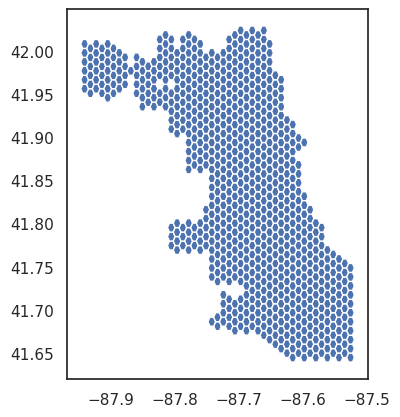

In [227]:
gdf.plot()

In [228]:
# Sorting columns
gdf = gdf.sort_values(by=['GRID_ID', 'year'])
# creating 'is_wave'
gdf["is_wave"] = (gdf["hom_ct"].astype(int) >= 3).astype(int)
# creating 'wave_group'
gdf["wave_group"] = (gdf["is_wave"].shift(fill_value=0) == 0) & (gdf["is_wave"] == 1)
gdf["wave_group"] = gdf["wave_group"].cumsum() * gdf["is_wave"]

In [229]:
wave_metrics = gdf[gdf["is_wave"] == 1].groupby(["GRID_ID", "wave_group"]).agg(
    wave_lifespan=("year", lambda x: x.max() - x.min() + 1),
    wave_amplitude=("hom_ct", "max"),
    wave_start_year=("year", "min")
).reset_index()

In [230]:
wave_metrics.head()

,GRID_ID,wave_group,wave_lifespan,wave_amplitude,wave_start_year
0,AA-10,1,1,3,1928
1,AA-10,2,1,5,1975
2,AA-10,3,2,5,1980
3,AA-10,4,2,4,1984
4,AA-10,5,5,6,1989


In [231]:
wave_frequency = wave_metrics.groupby("GRID_ID").size().reset_index(name="wave_frequency")

wave_frequency.head()

,GRID_ID,wave_frequency
0,AA-10,8
1,AA-11,8
2,AA-12,7
3,AA-13,9
4,AA-14,10


In [232]:
wave_metrics.GRID_ID.nunique()

391

In [233]:
wave_metrics["wave_decade"] = (wave_metrics["wave_start_year"] // 10) * 10
wave_rate_per_decade = wave_metrics.groupby(["GRID_ID", "wave_decade"]).size().reset_index(name="wave_rate")
wave_rate_per_decade = wave_rate_per_decade.groupby("GRID_ID")["wave_rate"].mean().reset_index(name="rate_per_decade")
wave_metrics["wave_amplitude"] = pd.to_numeric(wave_metrics["wave_amplitude"], errors="coerce")

wave_metrics.head(), wave_rate_per_decade.head()

(  GRID_ID  wave_group  wave_lifespan  wave_amplitude  wave_start_year  \
 0   AA-10           1              1               3             1928   
 1   AA-10           2              1               5             1975   
 2   AA-10           3              2               5             1980   
 3   AA-10           4              2               4             1984   
 4   AA-10           5              5               6             1989   
 
    wave_decade  
 0         1920  
 1         1970  
 2         1980  
 3         1980  
 4         1980  ,
   GRID_ID  rate_per_decade
 0   AA-10             1.60
 1   AA-11             2.00
 2   AA-12             1.75
 3   AA-13             2.25
 4   AA-14             1.25)

In [234]:
CURRENT_YEAR = 2017

In [235]:
longest_gaps = wave_metrics.groupby("GRID_ID").agg(
    last_wave_end=pd.NamedAgg(
        column="wave_start_year", 
        aggfunc=lambda x: (x + wave_metrics.loc[x.index, "wave_lifespan"]).max()
    )
).reset_index()

In [236]:
longest_gaps["longest_gap"] = CURRENT_YEAR - longest_gaps["last_wave_end"]
longest_gaps = longest_gaps.sort_values(by="longest_gap", ascending=False)


In [237]:
shapefile = gpd.read_file('Jada_Hexagons/hex_hom_bldg.shp')

In [238]:
shapefile.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644..."
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639..."
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644..."
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639..."
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644..."


In [239]:
map_data = shapefile.merge(longest_gaps, on="GRID_ID", how="left")

In [240]:
map_data['geometry'] = map_data.geometry.to_crs(epsg=4326)

In [241]:
map_data.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644...",NaN,NaN
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639...",NaN,NaN
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644...",1996.0,21.0
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639...",NaN,NaN
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644...",NaN,NaN


In [242]:
commarea = gpd.read_file('comm_area_shapefiles/CHI Community Areas.shp')
commarea.geometry = commarea.geometry.to_crs(epsg=4326)

In [243]:
%whos

Variable                Type             Data/Info
--------------------------------------------------
CURRENT_YEAR            int              2017
anomaly                 GeoDataFrame            GRID_ID  year  hom<...>n[3350 rows x 23 columns]
ax                      Axes             Axes(0.125,0.116427;0.62x0.757146)
ccrs                    module           <module 'cartopy.crs' fro<...>packages/cartopy/crs.py'>
commarea                GeoDataFrame         AREA  PERIMETER  COMA<...>n\n[77 rows x 10 columns]
commarea_intersecting   GeoDataFrame         AREA  PERIMETER  COMA<...>58, -87.63181 41.932...  
df                      DataFrame               GRID_ID  year hom_<...>[110014 rows x 6 columns]
fig                     Figure           Figure(1000x1000)
gdf                     GeoDataFrame            GRID_ID  year  hom<...>[110014 rows x 8 columns]
geo                     Polygon          POLYGON ((-87.57363104731<...>31007 41.79022740570815))
gpd                     module        

/tmp/ipykernel_1320/3882824580.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(commarea.geometry.centroid.x,
/tmp/ipykernel_1320/3882824580.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  commarea.geometry.centroid.y,


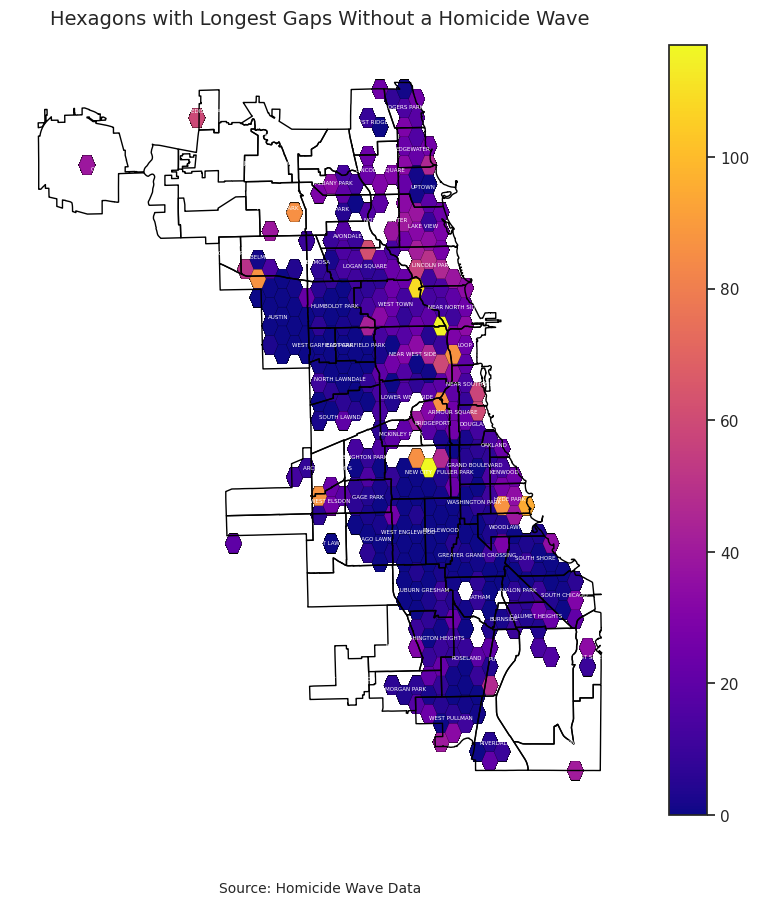

In [244]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all hexagons colored by longest_gap
map_data.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)

# Highlight top hexagons with longest gaps in red
#highlight_hexagons.plot(facecolor="red", edgecolor="black", linewidth=0.2, ax=ax)

# Add labels for highlighted hexagons (GRID_ID)
'''
for x, y, label in zip(highlight_hexagons['geometry'].centroid.x, 
                        highlight_hexagons.geometry.centroid.y, 
                        highlight_hexagons["GRID_ID"]):
    ax.text(x, y, label, fontsize=8, color="white", ha="center", va="center", weight="bold")
    '''

# Plot community boundaries

commarea.plot(facecolor="none", edgecolor="black", linewidth=1, ax=ax)

# Add community labels
for x, y, label in zip(commarea.geometry.centroid.x, 
                        commarea.geometry.centroid.y, 
                        commarea["COMMUNITY"]):
    ax.text(x, y, label, fontsize=4, color="white", ha="center", va="center")


# Title & Labels
ax.set_title("Hexagons with Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)
ax.annotate("Source: Homicide Wave Data", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Optional: Add basemap
# ctx.add_basemap(ax, crs=map_data.crs, source=ctx.providers.CartoDB.Positron)

# Show plot
plt.show()

In [245]:
map_data['longest_gap'].describe()

count    52394.000000
mean        14.219949
std         19.280926
min          0.000000
25%          0.000000
50%          7.000000
75%         21.000000
max        117.000000
Name: longest_gap, dtype: float64

# EXAMINING PROJECTS AND PROJECT OUTLIERS

In [246]:
projects = pd.read_csv('Affordable_Rental_Housing_Developments_20250212.csv') # Loading data found from Chicago Data Portal
# link: https://data.cityofchicago.org/Community-Economic-Development/Affordable-Rental-Housing-Developments-Map/k3g7-7kgc

In [247]:
# making geometry column
projects['geometry'] = projects.apply(
    lambda x: shapely.Point(x.Longitude, x.Latitude),
    axis = 1
)

In [248]:
# convert to geopandas
projects = gpd.GeoDataFrame(projects, geometry='geometry', 
                            crs='EPSG:4326'
                            )

In [249]:
projects.head()

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,geometry
0,Avondale,21,Multifamily,Hairpin Lofts,3414 W. Diversey Ave.,60647,773-292-6360,Leasing & Management Co. Inc.,25.0,1153078.890,1918447.998,41.932073,-87.712872,NaN,POINT (-87.71287 41.93207)
1,Loop,32,ARO,1000M,1000 S. Michigan Ave.,60605,312-820-1000,Willow Bridge,23.0,1177375.505,1895971.036,41.869878,-87.624269,NaN,POINT (-87.62427 41.86988)
2,Logan Square,22,ARO,2556 Armtiage LLC,2556 W. Armitage Ave,60647,773-252-0600,North Clybourn Group,1.0,1158751.315,1913231.215,41.917643,-87.692170,"(41.917642826462, -87.6921699562562)",POINT (-87.69217 41.91764)
3,Douglas,35,Multifamily,South Park Plaza,2600 S. King Dr.,60616,312-674-9210,Woodlawn Comm. Dev. Corp.,134.0,1179206.472,1887158.196,41.845653,-87.617816,"(41.8456529117633, -87.6178163910093)",POINT (-87.61782 41.84565)
4,Near West Side,28,ARO,The Rosie,1461 S. Blue Island Ave.,60608,872-259-7452,The FLATS,7.0,1168331.384,1892984.019,41.861881,-87.657558,"(41.86188117554516, -87.65755843617394)",POINT (-87.65756 41.86188)


In [250]:
projects.shape

(598, 15)

In [251]:
map_projects = gpd.sjoin(map_data, projects, predicate='intersects')

In [252]:
map_projects.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap,index_right,Community Area Name,...,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location
9,AS-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.53758 41.64454, -87.54059 41.639...",1976.0,41.0,140,Hegewisch,...,13550 S. Avenue O,60633,773-646-1333,Senior Lifestyle Corp.,116.0,1201038.059,1815487.733,41.648457,-87.540123,"(41.648457411436, -87.5401231660406)"
15,AK-36,1874,0.0,0.800000,0.0,"POLYGON ((-87.60968 41.65495, -87.61268 41.649...",2017.0,0.0,169,Riverdale,...,301 E. 132nd Pl,60627,773-568-7033,Habitat Company,258.0,1180750.042,1817671.924,41.654939,-87.614283,"(41.65493944937772, -87.61428282625099)"
15,AK-36,1874,0.0,0.800000,0.0,"POLYGON ((-87.60968 41.65495, -87.61268 41.649...",2017.0,0.0,296,Riverdale,...,13037 S. Daniel Dr.,60627,773-995-5200,"DRE, Inc.",75.0,1180294.274,1818758.372,41.657931,-87.615917,"(41.6579312533062, -87.6159174009456)"
27,AH-35,1874,0.0,0.784286,0.0,"POLYGON ((-87.63671 41.67056, -87.63972 41.665...",2017.0,0.0,279,West Pullman,...,12045 S. Emerald Ave.,60628,773-568-3000,Source Works Development,90.0,1173523.536,1824810.063,41.674690,-87.640515,"(41.6746900778514, -87.6405148423398)"
48,AH-34,1874,0.0,0.007127,0.0,"POLYGON ((-87.63671 41.68096, -87.63972 41.675...",2012.0,5.0,463,West Pullman,...,825 W. 118th St.,60643,773-568-2929,Source Works Management,70.0,1172827.454,1826559.720,41.679507,-87.643011,"(41.6795067550453, -87.6430113026999)"


In [253]:
map_projects['Community Area Name'].isna().value_counts()

Community Area Name
False    80132
Name: count, dtype: int64

In [254]:
map_projects['GRID_ID'].value_counts()

GRID_ID
AB-16    2814
AA-13    2680
AM-20    1876
AG-6     1742
AC-11    1474
         ... 
AN-25     134
AP-25     134
AN-22     134
AM-21     134
AK-13     134
Name: count, Length: 216, dtype: int64

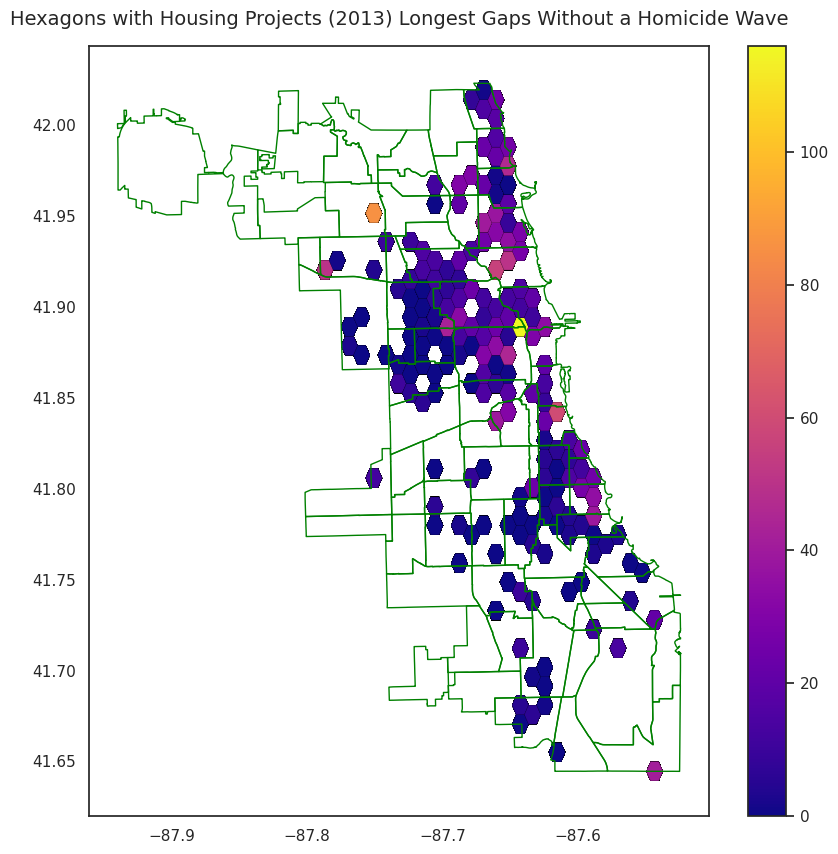

In [255]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all hexagons colored by longest_gap
map_projects.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Housing Projects (2013) Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

# Plot community boundaries

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

# Add community labels
'''
for x, y, label in zip(commarea.geometry.centroid.x, 
                        commarea.geometry.centroid.y, 
                        commarea["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="white", ha="center", va="center")'''

plt.savefig('viz/projects_longest_gaps.png')

plt.show()

In [256]:
map_projects['longest_gap'].describe()

count    74370.000000
mean        10.499099
std         13.073598
min          0.000000
25%          1.000000
50%          6.000000
75%         15.000000
max        116.000000
Name: longest_gap, dtype: float64

In [257]:
anomaly = map_projects[map_projects['longest_gap'] > 36]

In [258]:
anomaly

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap,index_right,Community Area Name,...,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location
9,AS-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.53758 41.64454, -87.54059 41.639...",1976.0,41.0,140,Hegewisch,...,13550 S. Avenue O,60633,773-646-1333,Senior Lifestyle Corp.,116.0,1201038.059,1815487.733,41.648457,-87.540123,"(41.648457411436, -87.5401231660406)"
306,AF-19,1874,1.0,18.369836,0.054437,"POLYGON ((-87.65474 41.83705, -87.65774 41.831...",1978.0,39.0,255,Bridgeport,...,2928 S. Archer Ave.,60608,773-376-2360,Preservation Housing Management LLC,55.0,1168114.670,1885548.333,41.841482,-87.658568,"(41.84148167339779, -87.65856843550151)"
328,AK-18,1874,0.0,0.000000,NaN,"POLYGON ((-87.60968 41.84226, -87.61268 41.837...",1957.0,60.0,3,Douglas,...,2600 S. King Dr.,60616,312-674-9210,Woodlawn Comm. Dev. Corp.,134.0,1179206.472,1887158.196,41.845653,-87.617816,"(41.8456529117633, -87.6178163910093)"
377,AG-15,1874,0.0,7.577510,0.000000,"POLYGON ((-87.64573 41.87348, -87.64873 41.868...",1972.0,45.0,288,Near West Side,...,1125 W. Van Buren St.,66007,312-262-6406,Tandem Property Management,5.0,1168864.113,1898292.938,41.876438,-87.655449,"(41.8764377440362, -87.6554489851593)"
377,AG-15,1874,0.0,7.577510,0.000000,"POLYGON ((-87.64573 41.87348, -87.64873 41.868...",1972.0,45.0,286,Near West Side,...,1050 W. Van Buren St.,60607,312-327-1101,Sage West Loop,16.0,1169278.088,1898384.787,41.876681,-87.653926,"(41.876680801678525, -87.65392634483864)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109811,AG-5,2016,1.0,212.572467,0.004704,"POLYGON ((-87.64573 41.97754, -87.64873 41.972...",1971.0,46.0,417,Uptown,...,4946 N. Sheridan Road,60640,312-447-4621,Mercy Housing,100.0,1168689.933,1933461.587,41.972946,-87.655067,"(41.9729461220532, -87.6550671246698)"
109811,AG-5,2016,1.0,212.572467,0.004704,"POLYGON ((-87.64573 41.97754, -87.64873 41.972...",1971.0,46.0,180,Uptown,...,5009 N. Sheridan Road,60640,317-596-2168,Zidan Management Group,16.0,1168763.559,1933706.921,41.973618,-87.654789,"(41.9736177253694, -87.6547892430962)"
109934,AN-24,2016,1.0,188.789278,0.005297,"POLYGON ((-87.58264 41.78502, -87.58565 41.779...",1978.0,39.0,193,Woodlawn,...,6230 S. Dorchester Ave.,60637,773-288-4202,Woodlawn East Community,84.0,1186573.262,1863816.865,41.781431,-87.591521,"(41.781431130748, -87.5915208532369)"
109934,AN-24,2016,1.0,188.789278,0.005297,"POLYGON ((-87.58264 41.78502, -87.58565 41.779...",1978.0,39.0,135,Woodlawn,...,1410 E. 62nd St.,60637,773-572-5500,The Thresholds,67.0,1186722.404,1864209.572,41.782505,-87.590962,"(41.782505219358, -87.5909616432556)"


In [259]:
anomaly.GRID_ID.unique()

array(['AS-37', 'AF-19', 'AK-18', 'AG-15', 'AB-14', 'AH-14', 'R-11',
       'AF-11', 'AG-10', 'V-8', 'AE-8', 'AF-8', 'AG-5', 'AN-24'],
      dtype=object)

In [260]:
anomaly.columns

Index(['GRID_ID', 'year', 'hom_ct', 'bldg_ct', 'hom_rt', 'geometry',
       'last_wave_end', 'longest_gap', 'index_right', 'Community Area Name',
       'Community Area Number', 'Property Type', 'Property Name', 'Address',
       'Zip Code', 'Phone Number', 'Management Company', 'Units',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [261]:
wave_metrics['wave_end_year'] = wave_metrics['wave_start_year'] + wave_metrics['wave_lifespan']

In [262]:
wave_metrics.columns

Index(['GRID_ID', 'wave_group', 'wave_lifespan', 'wave_amplitude',
       'wave_start_year', 'wave_decade', 'wave_end_year'],
      dtype='object')

In [263]:
wave_metrics.wave_end_year

0       1929
1       1976
2       1982
3       1986
4       1994
        ... 
2819    1997
2820    2001
2821    2012
2822    1996
2823    2000
Name: wave_end_year, Length: 2824, dtype: int64

In [264]:
wave_metrics[
    (wave_metrics.wave_end_year.isin(range(1880, 1990)))
    &
              (wave_metrics.GRID_ID == 'AG-15')
                ]

,GRID_ID,wave_group,wave_lifespan,wave_amplitude,wave_start_year,wave_decade,wave_end_year
935,AG-15,936,1,3,1890,1890,1891
936,AG-15,937,1,3,1892,1890,1893
937,AG-15,938,1,5,1897,1890,1898
938,AG-15,939,2,4,1902,1900,1904
939,AG-15,940,1,6,1907,1900,1908
940,AG-15,941,4,3,1909,1900,1913
941,AG-15,942,12,10,1914,1910,1926
942,AG-15,943,3,9,1927,1920,1930
943,AG-15,944,1,3,1942,1940,1943
944,AG-15,945,1,4,1944,1940,1945


/tmp/ipykernel_1320/1857669521.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(commarea_intersecting.geometry.centroid.x,
/tmp/ipykernel_1320/1857669521.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  commarea_intersecting.geometry.centroid.y,
/tmp/ipykernel_1320/1857669521.py:37: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  legend.append((i, (int(wave_sub_df.loc[:, 'wave_start_year']), int(wave_sub_df.loc[:, 'wave_end_year']))))
/tmp/ipykernel_1320/1857669521.py:37: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int

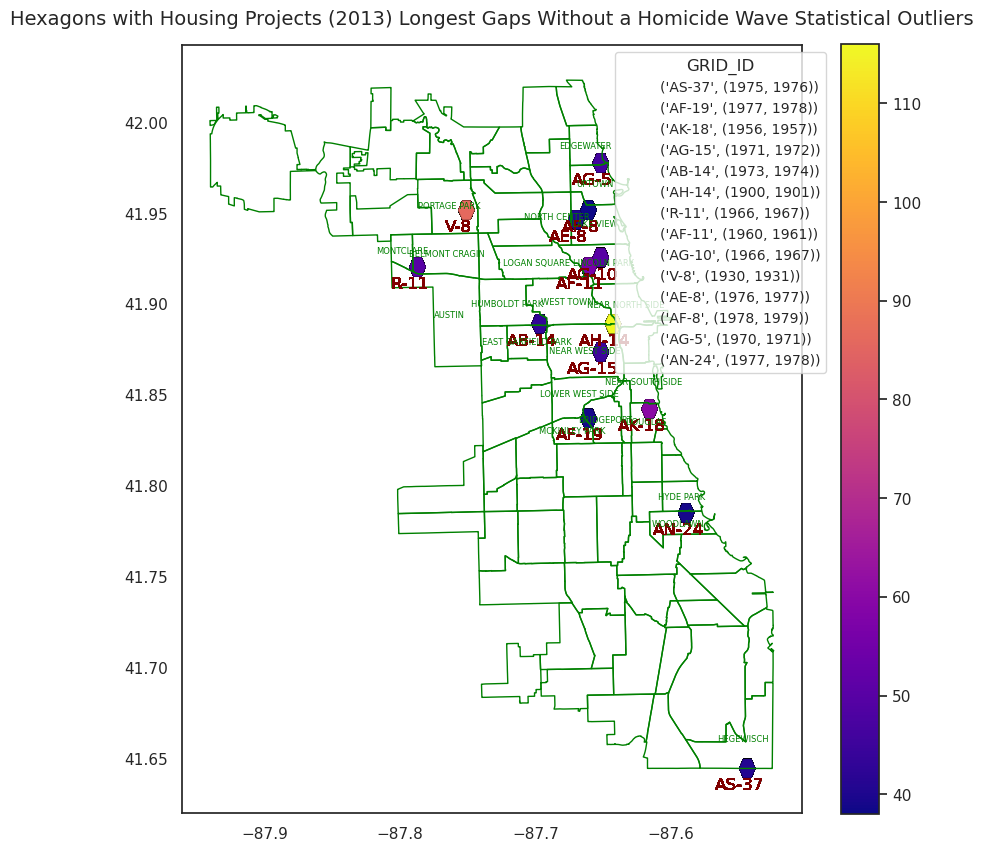

In [265]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_style(rc={'axes.facecolor':'white', 'figure.facecolor': 'white'})

# Plot all hexagons colored by longest_gap
anomaly.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Housing Projects (2013) Longest Gaps Without a Homicide Wave Statistical Outliers", fontsize=14, pad=15)

wave_sub_df = wave_metrics[(wave_metrics.wave_end_year.isin(anomaly.last_wave_end)) &
                (wave_metrics.GRID_ID.isin(anomaly.GRID_ID))]

for geo, label in zip(anomaly.geometry,
                        anomaly.GRID_ID):
    x_min, y_min, x_max, y_max = geo.bounds
    ax.text(x_min, y_min, label, 
             fontsize=12, color='maroon' , ha="center", va="top", weight="light", wrap=True)
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

# Filter for communities that intersect with anomaly hexagons
commarea_intersecting = commarea[commarea.geometry.apply(lambda g: anomaly.geometry.intersects(g).any())]

# Add labels for only the intersecting communities
for x, y, label in zip(commarea_intersecting.geometry.centroid.x, 
                        commarea_intersecting.geometry.centroid.y, 
                        commarea_intersecting["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="green", ha="center", va="center", wrap=True)


legend = []

for i in anomaly['GRID_ID'].unique():
    wave_sub_df = wave_metrics[(wave_metrics.wave_end_year==anomaly[anomaly['GRID_ID']==i]['last_wave_end'].max()) &
                (wave_metrics.GRID_ID==i)]
    legend.append((i, (int(wave_sub_df.loc[:, 'wave_start_year']), int(wave_sub_df.loc[:, 'wave_end_year']))))

handles = [plt.Line2D([0], [0], linestyle='', label=grid_id) for grid_id in legend]
plt.legend(handles=handles, fontsize=10, title="GRID_ID", bbox_to_anchor=(1.05, 1), loc='upper right')

plt.savefig('viz/projects_longest_gaps_outliers.png')

plt.show()

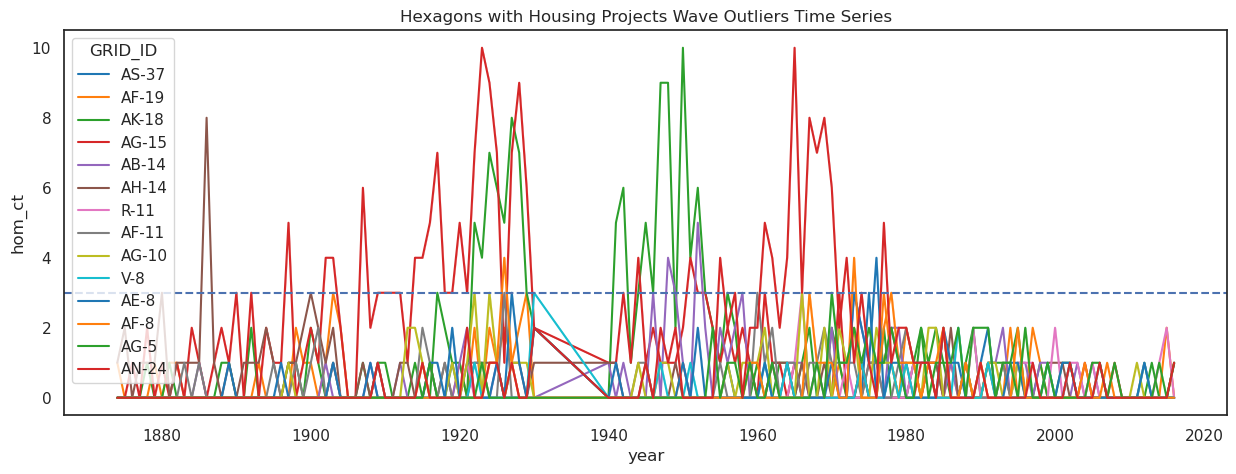

In [266]:
fig, ax = plt.subplots(figsize=(15, 5))

palette = sns.color_palette("tab10", n_colors=anomaly["GRID_ID"].nunique())

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=anomaly,
             palette=palette)

plt.title('Hexagons with Housing Projects Wave Outliers Time Series')

plt.axhline(y=3, linestyle='--', label='homicide count = 3')

plt.savefig('viz/projects_outliers_timeseries.png')

plt.show()

In [298]:
anomaly.to_csv('projects_gap_outliers_wonky.csv')

AK-18, AG-15

# OUTLIERS FOR ALL HEXAGONS - WAVE GAP AND AMPLITUDE

In [267]:
outlier = map_data[map_data['longest_gap'] > 60]

In [268]:
outlier.GRID_ID.unique()

array(['X-23', 'AF-21', 'AG-21', 'AH-18', 'AI-15', 'AH-14', 'AF-12',
       'S-11', 'AB-10', 'V-8', 'AM-23', 'AO-23'], dtype=object)

/tmp/ipykernel_1320/3213249369.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(commarea_intersecting.geometry.centroid.x,
/tmp/ipykernel_1320/3213249369.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  commarea_intersecting.geometry.centroid.y,
/tmp/ipykernel_1320/3213249369.py:32: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  legend.append((i, (int(wave_sub_df.loc[:, 'wave_start_year']), int(wave_sub_df.loc[:, 'wave_end_year']))))
/tmp/ipykernel_1320/3213249369.py:32: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int

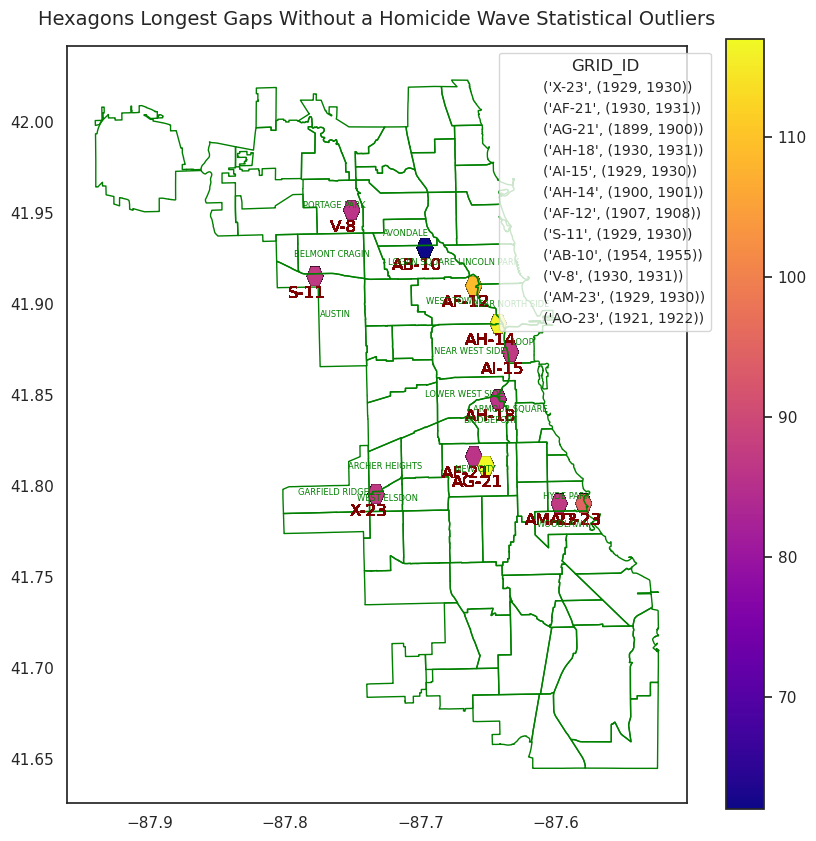

In [269]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_style(rc={'axes.facecolor':'white', 'figure.facecolor': 'white'})

# Plot all hexagons colored by longest_gap
outlier.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons Longest Gaps Without a Homicide Wave Statistical Outliers", fontsize=14, pad=15)

for geo, label in zip(outlier.geometry,
                        outlier.GRID_ID):
    x_min, y_min, x_max, y_max = geo.bounds
    ax.text(x_min, y_min, label, 
             fontsize=12, color='maroon', ha="center", va="top", weight="light", wrap=True)
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

commarea_intersecting = commarea[commarea.geometry.apply(lambda g: outlier.geometry.intersects(g).any())]

# Add labels for only the intersecting communities
for x, y, label in zip(commarea_intersecting.geometry.centroid.x, 
                        commarea_intersecting.geometry.centroid.y, 
                        commarea_intersecting["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="green", ha="center", va="center", wrap=True)

legend = []

for i in outlier['GRID_ID'].unique():
    wave_sub_df = wave_metrics[(wave_metrics.wave_end_year==outlier[outlier['GRID_ID']==i]['last_wave_end'].max()) &
                (wave_metrics.GRID_ID==i)]
    legend.append((i, (int(wave_sub_df.loc[:, 'wave_start_year']), int(wave_sub_df.loc[:, 'wave_end_year']))))

handles = [plt.Line2D([0], [0], linestyle='', label=grid_id) for grid_id in legend]

plt.legend(handles=handles, title="GRID_ID", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper right')

plt.savefig('viz/outliers.png')

plt.show()

/tmp/ipykernel_1320/2706028215.py:5: UserWarning: The palette list has more values (14) than needed (12), which may not be intended.
  sns.lineplot(x='year',


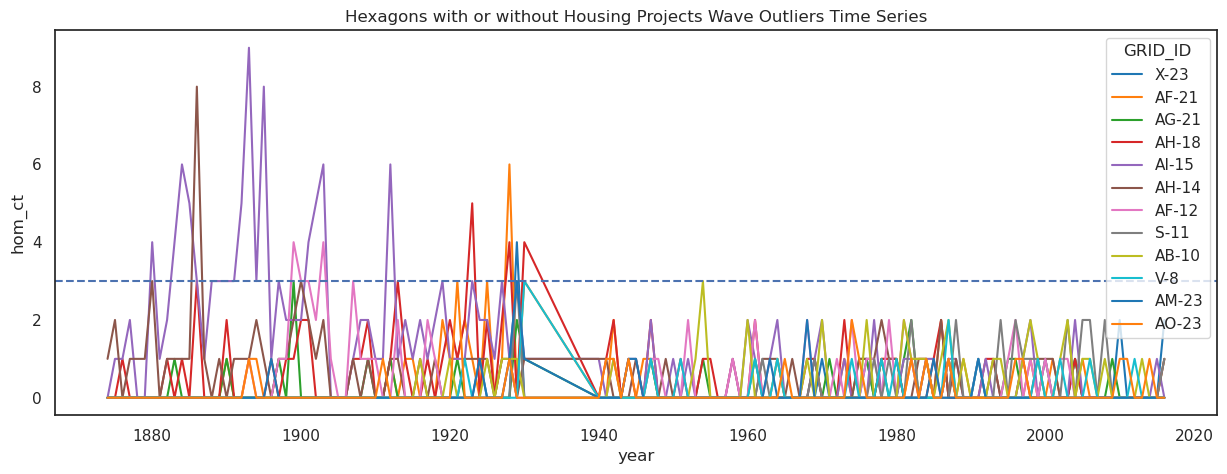

In [270]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=outlier,
             palette=palette)

plt.title('Hexagons with or without Housing Projects Wave Outliers Time Series')
sns.color_palette('deep')
plt.axhline(y=3, linestyle='--', label='homicide count = 3')

plt.savefig('viz/outliers_timeseries.png')

In [271]:
# max and minimum amplitude of wave
wave_metrics['max_amp'] = wave_metrics.apply(
    lambda x: wave_metrics['wave_amplitude'].groupby(wave_metrics['GRID_ID']).max()[x['GRID_ID']],
    axis=1
)
wave_metrics['min_amp'] = wave_metrics.apply(
    lambda x: wave_metrics['wave_amplitude'].groupby(wave_metrics['GRID_ID']).min()[x['GRID_ID']],
    axis=1
)

In [272]:
wave_metrics['max_amp'].describe()

count    2824.000000
mean        8.481586
std         3.855936
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        25.000000
Name: max_amp, dtype: float64

In [273]:
top_amp = wave_metrics[wave_metrics['max_amp']>19]
top_amp = map_data[map_data['GRID_ID'].isin(top_amp['GRID_ID'].unique())]

/tmp/ipykernel_1320/3316442791.py:5: UserWarning: The palette list has more values (14) than needed (7), which may not be intended.
  sns.lineplot(x='year',


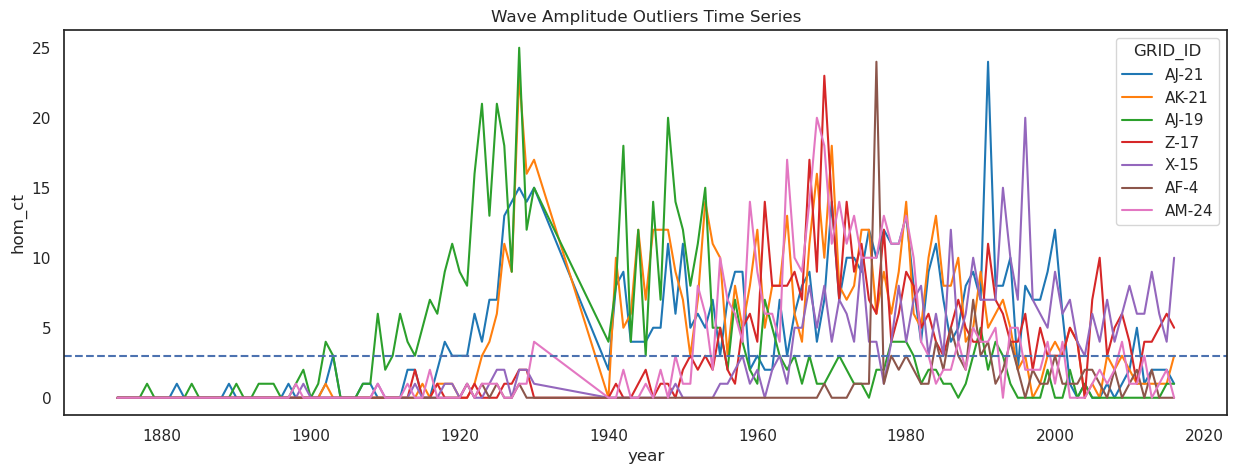

In [274]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=top_amp,
             palette=palette)

plt.title('Wave Amplitude Outliers Time Series')
sns.color_palette('deep')
plt.axhline(y=3, linestyle='--', label='homicide count = 3')

plt.savefig('viz/wave_amplitude_outliers_timeseries.png')

In [276]:
map_data[map_data['GRID_ID']==('AJ-19')]

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
310,AJ-19,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
1131,AJ-19,1875,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
1952,AJ-19,1876,0.0,0.659218,0.000000,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
2773,AJ-19,1877,0.0,1.318436,0.000000,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
3594,AJ-19,1878,1.0,1.977654,0.505650,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
...,...,...,...,...,...,...,...,...
106219,AJ-19,2012,0.0,250.062237,0.000000,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
107040,AJ-19,2013,0.0,250.406741,0.000000,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
107861,AJ-19,2014,0.0,250.751244,0.000000,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
108682,AJ-19,2015,1.0,251.095748,0.003983,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0


unique patterns: AF-4 (last wave 2001), AJ-19 (last wave 1994),

In [277]:
top_amp.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
279,AJ-21,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.81624, -87.62169 41.811...",2012.0,5.0
280,AK-21,1874,0.0,0.735287,0.0,"POLYGON ((-87.60968 41.81104, -87.61268 41.805...",2017.0,0.0
310,AJ-19,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0
333,Z-17,1874,0.0,0.210504,0.0,"POLYGON ((-87.70881 41.85787, -87.71181 41.852...",2017.0,0.0
368,X-15,1874,0.0,0.668948,0.0,"POLYGON ((-87.72683 41.87868, -87.72984 41.873...",2017.0,0.0


In [278]:
wave_metrics.groupby('GRID_ID').max().loc['AA-10']['max_amp']

np.int64(6)

In [279]:
top_amp['max_amp'] = top_amp.apply(lambda x:
                                   wave_metrics.groupby('GRID_ID').max().loc[x.GRID_ID]['max_amp'],
                                   axis=1
        )

/home/nitomanto/anaconda3/envs/ujp_env/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


/tmp/ipykernel_1320/3321400947.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(commarea_intersecting.geometry.centroid.x,
/tmp/ipykernel_1320/3321400947.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  commarea_intersecting.geometry.centroid.y,


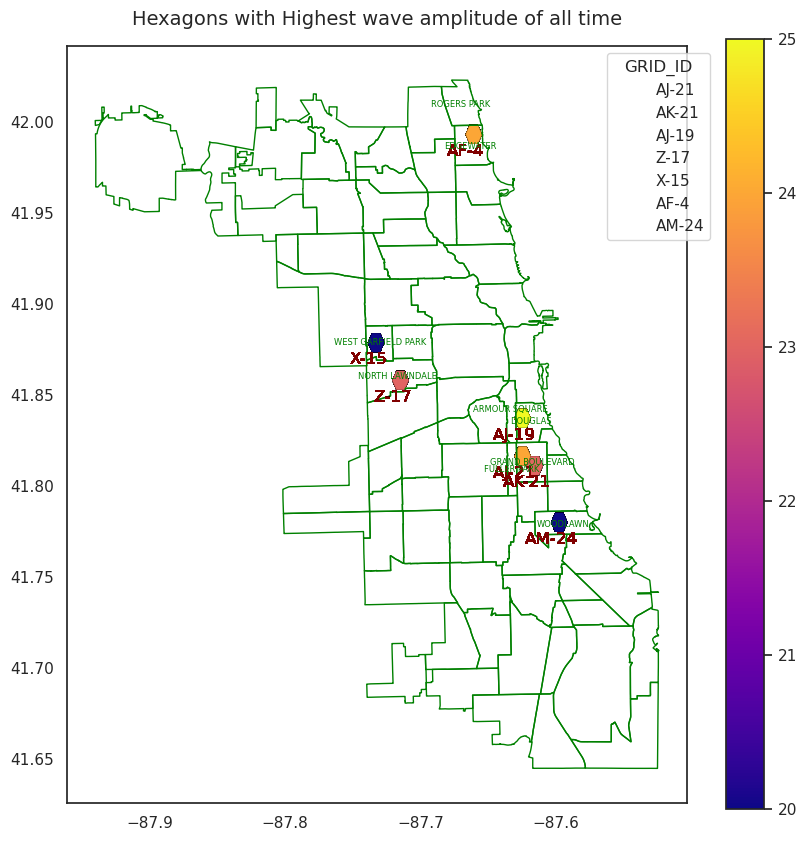

In [280]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_style(rc={'axes.facecolor':'white', 'figure.facecolor': 'white'})

# Plot all hexagons colored by longest_gap
top_amp.plot(column="max_amp", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Highest wave amplitude of all time", fontsize=14, pad=15)

for geo, label in zip(top_amp.geometry,
                        top_amp.GRID_ID):
    x_min, y_min, x_max, y_max = geo.bounds
    ax.text(x_min, y_min, label, 
             fontsize=12, color='maroon' , ha="center", va="top", weight="light", wrap=True)
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

# Filter for communities that intersect with anomaly hexagons
commarea_intersecting = commarea[commarea.geometry.apply(lambda g: top_amp.geometry.intersects(g).any())]

# Add labels for only the intersecting communities
for x, y, label in zip(commarea_intersecting.geometry.centroid.x, 
                        commarea_intersecting.geometry.centroid.y, 
                        commarea_intersecting["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="green", ha="center", va="center")

unique_ids = top_amp["GRID_ID"].unique()

handles = [plt.Line2D([0], [0], linestyle='', label=grid_id) for grid_id in unique_ids]
plt.legend(handles=handles, title="GRID_ID", bbox_to_anchor=(1.05, 1), loc='upper right')

plt.savefig('viz/wave_amplitude_outliers.png')

plt.show()

In [299]:
outlier.to_csv('gap_outliers.csv')

In [300]:
top_amp.to_csv('wave_amp_outliers.csv')

# CHECKING OVERLAP

In [281]:
top_amp.GRID_ID.unique(), outlier.GRID_ID.unique(), anomaly.GRID_ID.unique()

(array(['AJ-21', 'AK-21', 'AJ-19', 'Z-17', 'X-15', 'AF-4', 'AM-24'],
       dtype=object),
 array(['X-23', 'AF-21', 'AG-21', 'AH-18', 'AI-15', 'AH-14', 'AF-12',
        'S-11', 'AB-10', 'V-8', 'AM-23', 'AO-23'], dtype=object),
 array(['AS-37', 'AF-19', 'AK-18', 'AG-15', 'AB-14', 'AH-14', 'R-11',
        'AF-11', 'AG-10', 'V-8', 'AE-8', 'AF-8', 'AG-5', 'AN-24'],
       dtype=object))

In [282]:
[(i, i in anomaly['GRID_ID'].unique()) for i in top_amp.GRID_ID.unique()]

[('AJ-21', False),
 ('AK-21', False),
 ('AJ-19', False),
 ('Z-17', False),
 ('X-15', False),
 ('AF-4', False),
 ('AM-24', False)]

In [283]:
# project anomalies that are also chicago outliers: V-8, AH-14
# Chicago outliers

In [284]:
map_projects.columns

Index(['GRID_ID', 'year', 'hom_ct', 'bldg_ct', 'hom_rt', 'geometry',
       'last_wave_end', 'longest_gap', 'index_right', 'Community Area Name',
       'Community Area Number', 'Property Type', 'Property Name', 'Address',
       'Zip Code', 'Phone Number', 'Management Company', 'Units',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [285]:
map_projects[map_projects['GRID_ID']=='V-8']

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap,index_right,Community Area Name,...,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location
517,V-8,1874,0.0,0.000000,NaN,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,239,Portage Park,...,4715 W. Irving Park Road,60641,872-278-4179,Life Care Services,11.0,1143974.592,1926130.299,41.953329,-87.746136,"(41.95332945388426, -87.74613600967054)"
517,V-8,1874,0.0,0.000000,NaN,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,307,Portage Park,...,4714 W Irving Park,60641,312-585-8512,RL Accelerated,6.0,1143972.738,1926210.278,41.953549,-87.746141,"(41.9535489566804, -87.7461408109366)"
1338,V-8,1875,0.0,0.000000,NaN,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,239,Portage Park,...,4715 W. Irving Park Road,60641,872-278-4179,Life Care Services,11.0,1143974.592,1926130.299,41.953329,-87.746136,"(41.95332945388426, -87.74613600967054)"
1338,V-8,1875,0.0,0.000000,NaN,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,307,Portage Park,...,4714 W Irving Park,60641,312-585-8512,RL Accelerated,6.0,1143972.738,1926210.278,41.953549,-87.746141,"(41.9535489566804, -87.7461408109366)"
2159,V-8,1876,0.0,0.000000,NaN,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,239,Portage Park,...,4715 W. Irving Park Road,60641,872-278-4179,Life Care Services,11.0,1143974.592,1926130.299,41.953329,-87.746136,"(41.95332945388426, -87.74613600967054)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108068,V-8,2014,0.0,1219.308540,0.0,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,307,Portage Park,...,4714 W Irving Park,60641,312-585-8512,RL Accelerated,6.0,1143972.738,1926210.278,41.953549,-87.746141,"(41.9535489566804, -87.7461408109366)"
108889,V-8,2015,0.0,1219.387017,0.0,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,239,Portage Park,...,4715 W. Irving Park Road,60641,872-278-4179,Life Care Services,11.0,1143974.592,1926130.299,41.953329,-87.746136,"(41.95332945388426, -87.74613600967054)"
108889,V-8,2015,0.0,1219.387017,0.0,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,307,Portage Park,...,4714 W Irving Park,60641,312-585-8512,RL Accelerated,6.0,1143972.738,1926210.278,41.953549,-87.746141,"(41.9535489566804, -87.7461408109366)"
109710,V-8,2016,0.0,1225.228070,0.0,"POLYGON ((-87.74486 41.95152, -87.74786 41.946...",1931.0,86.0,239,Portage Park,...,4715 W. Irving Park Road,60641,872-278-4179,Life Care Services,11.0,1143974.592,1926130.299,41.953329,-87.746136,"(41.95332945388426, -87.74613600967054)"


# POST DEPRESSION

In [286]:
post_depression = map_data.copy()

In [287]:
post_depression.columns

Index(['GRID_ID', 'year', 'hom_ct', 'bldg_ct', 'hom_rt', 'geometry',
       'last_wave_end', 'longest_gap'],
      dtype='object')

In [288]:
post_depression['longest_gap'] = post_depression.apply(lambda x:
                                CURRENT_YEAR - x['last_wave_end'] if
                                x['last_wave_end'] > 1940 else np.nan,
                                axis=1)

In [289]:
post_depression.dropna(how='any', inplace=True)

In [290]:
post_depression['longest_gap'].describe()

count    49859.000000
mean        11.828837
std         13.555928
min          0.000000
25%          0.000000
50%          7.000000
75%         20.000000
max         62.000000
Name: longest_gap, dtype: float64

In [291]:
post_dep_outlier = post_depression[post_depression['longest_gap'] >= 50]

In [292]:
post_dep_outlier.GRID_ID.nunique()

8

/tmp/ipykernel_1320/2550406620.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(post_dep_outlier.geometry.centroid.x,
/tmp/ipykernel_1320/2550406620.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  post_dep_outlier.geometry.centroid.y,
/tmp/ipykernel_1320/2550406620.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(commarea_intersecting.geometry.centroid.x,
/tmp/ipykernel_1320/2550406620.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re

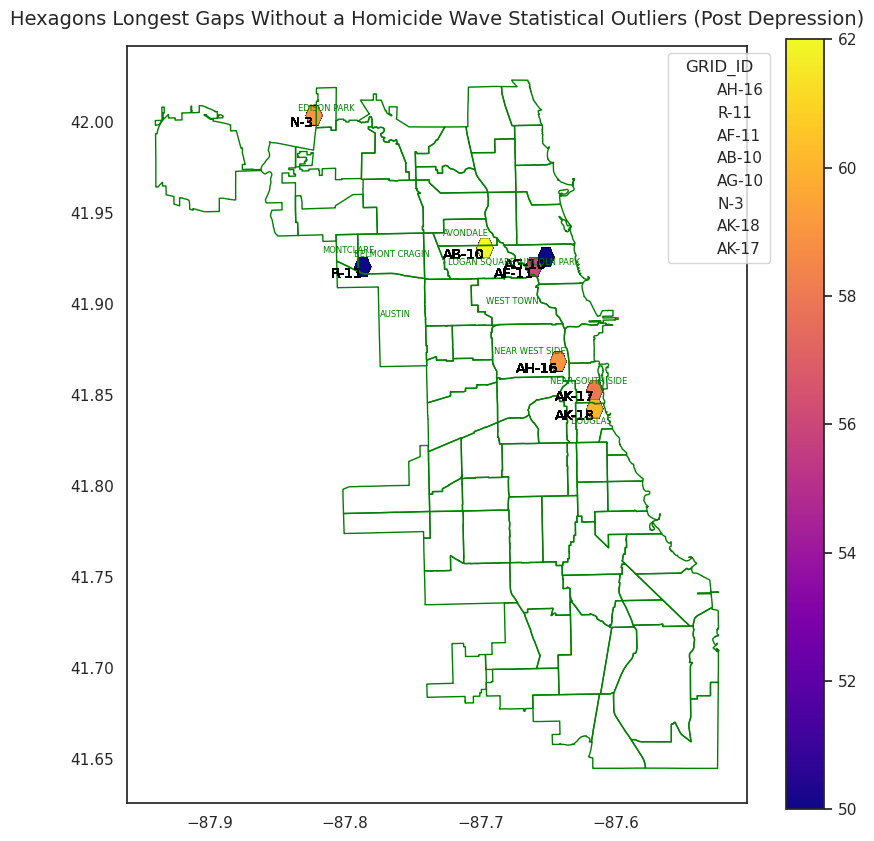

In [293]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_style(rc={'axes.facecolor':'white', 'figure.facecolor': 'white'})

# Plot all hexagons colored by longest_gap
post_dep_outlier.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons Longest Gaps Without a Homicide Wave Statistical Outliers (Post Depression)", fontsize=14, pad=15)

for x, y, label in zip(post_dep_outlier.geometry.centroid.x, 
                        post_dep_outlier.geometry.centroid.y, 
                        post_dep_outlier["GRID_ID"]):
    ax.text(x, y, label, fontsize=10, color="black", ha="right", va="top", weight="light", wrap=True)
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

# Filter for communities that intersect with anomaly hexagons
commarea_intersecting = commarea[commarea.geometry.apply(lambda g: post_dep_outlier.geometry.intersects(g).any())]

# Add labels for only the intersecting communities
for x, y, label in zip(commarea_intersecting.geometry.centroid.x, 
                        commarea_intersecting.geometry.centroid.y, 
                        commarea_intersecting["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="green", ha="center", va="center", wrap=True)

unique_ids = post_dep_outlier["GRID_ID"].unique()

handles = [plt.Line2D([0], [0], linestyle='', label=grid_id) for grid_id in unique_ids]
plt.legend(handles=handles, title="GRID_ID", bbox_to_anchor=(1.05, 1), loc='upper right')

plt.savefig('viz/post_dep_outliers.png')

plt.show()

/tmp/ipykernel_1320/4047047077.py:5: UserWarning: The palette list has more values (14) than needed (8), which may not be intended.
  sns.lineplot(x='year',


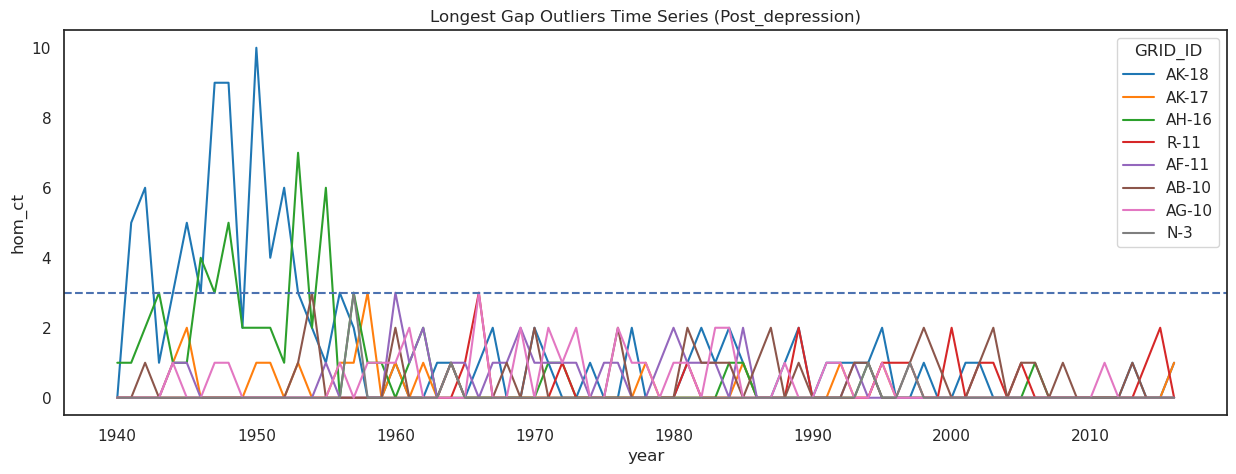

In [294]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=post_dep_outlier[post_dep_outlier['year'] >= 1940],
             palette=palette)

plt.title('Longest Gap Outliers Time Series (Post_depression)')
sns.color_palette('deep')
plt.axhline(y=3, linestyle='--', label='homicide count = 3')

plt.savefig('viz/post_dep_outliers_timeseries.png')

In [295]:
wave_metrics.columns

Index(['GRID_ID', 'wave_group', 'wave_lifespan', 'wave_amplitude',
       'wave_start_year', 'wave_decade', 'wave_end_year', 'max_amp',
       'min_amp'],
      dtype='object')

In [296]:
map_projects[map_projects['GRID_ID'] == 'AK-18']['Community Area Name'].unique()

array(['Douglas'], dtype=object)

In [297]:
top_amp[top_amp['GRID_ID']=='AF-4']['last_wave_end']

638       2001.0
1459      2001.0
2280      2001.0
3101      2001.0
3922      2001.0
           ...  
106547    2001.0
107368    2001.0
108189    2001.0
109010    2001.0
109831    2001.0
Name: last_wave_end, Length: 134, dtype: float64

In [302]:
map_projects.to_csv('map_projects.csv')

In [303]:
map_data.to_csv('map_data.csv')

In [304]:
wave_metrics.to_csv('wave_metrics.csv')